## IMPORT LIBRARIES

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=df93fc477bd8624be8a96fb848620810e5496845cd08a5ed21e38f5ab415e917
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from langdetect import detect
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## CONNECT TO DRIVE

In [ ]:
# Authenticate to connect to colab

from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread

auth.authenticate_user()

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1fiwd57qpJOJ0FhEVschZKPK_SLOLjrm1j5Wo1QhekWo/edit#gid=1582168941')
sheet = wb.worksheet('Komen Play Among Us1')

# get_all_values gives a list of rows.

data = sheet.get_all_values()

## OVERVIEW

In [ ]:
# Load, convert to a DataFrame and render.

df = pd.DataFrame.from_records(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.drop(columns = '')

In [ ]:
# Changing column name

cols = ['Rating', 'User', 'Review', 'Date']

df.columns = cols

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32080 entries, 1 to 32080
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  32080 non-null  object
 1   User    32080 non-null  object
 2   Review  32080 non-null  object
 3   Date    32080 non-null  object
dtypes: object(4)
memory usage: 1002.6+ KB


In [ ]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,Rating,object,0,0.0,5,[Rated 4 stars out of five stars]
1,User,object,0,0.0,31806,[Mohit Chaudhary]
2,Review,object,0,0.0,32077,[The best game of 2020 although you could just...
3,Date,object,0,0.0,29,"[September 29, 2020]"


## PREPROCESSING

In [ ]:
# Fixing Date feature

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Rating,User,Review,Date
1,Rated 4 stars out of five stars,Epic Sean22,Hey there! This game is really fun and all but...,2020-10-17
2,Rated 4 stars out of five stars,Wan Taquddin,"Everything about this game is amazing, the con...",2020-10-15
3,Rated 5 stars out of five stars,Eve,I love playing this game! It is so much fun wh...,2020-10-15
4,Rated 5 stars out of five stars,Gab .M,Its extremely fun and addictive! It got pretty...,2020-10-16
5,Rated 5 stars out of five stars,Kaizin,I love this game a lot! I have a lot of fun wi...,2020-10-16


In [ ]:
# Fixing Rating feature

vals = {'Rated 1 stars out of five stars': '1', 'Rated 2 stars out of five stars': '2', 
        'Rated 3 stars out of five stars': '3', 'Rated 4 stars out of five stars': '4', 
        'Rated 5 stars out of five stars': '5'}

df['Rating'] = df['Rating'].replace(vals)

In [ ]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,Rating,object,0,0.0,5,[2]
1,User,object,0,0.0,31806,[Abigail Troup]
2,Review,object,0,0.0,32077,"[Really fun, even better when playing with fri..."
3,Date,datetime64[ns],0,0.0,29,[2020-10-15 00:00:00]


## SIMPLE EXPLORATORY ANALYSIS

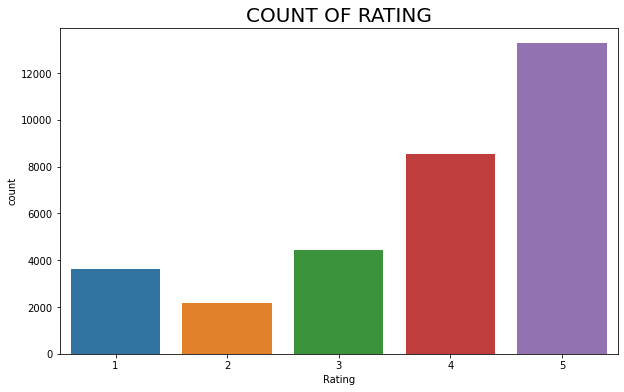

In [ ]:
# Rating feature

plt.figure(figsize = (10,6))
plt.title('COUNT OF RATING', fontsize=20)
sns.countplot(df['Rating'].sort_values())
plt.show()

In [ ]:
df['Rating'].value_counts()

5    13276
4     8529
3     4455
1     3645
2     2175
Name: Rating, dtype: int64

In [ ]:
# User feature, finding the duplicate

dup = df[df['User'].duplicated()]['User']

dup_list = [i for i in dup]

In [ ]:
# Function to transform a list to sting

def tostring(s):  
    
    string = " " 
    
    return (string.join(s)) 

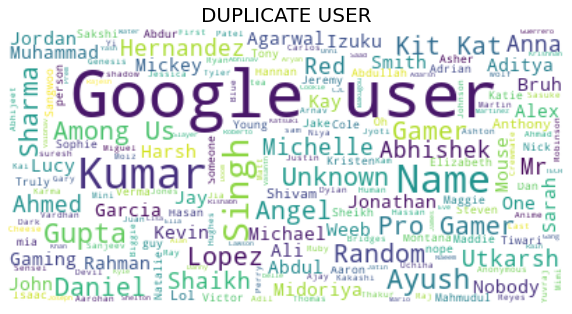

In [ ]:
# Showing duplicate User wordcloud

dup_user = WordCloud(background_color='white').generate(tostring(dup_list))

plt.figure(figsize = (10,10))
plt.title('DUPLICATE USER', fontsize=20)
plt.imshow(dup_user, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Review feature

df['Review']

1        Hey there! This game is really fun and all but...
2        Everything about this game is amazing, the con...
3        I love playing this game! It is so much fun wh...
4        Its extremely fun and addictive! It got pretty...
5        I love this game a lot! I have a lot of fun wi...
                               ...                        
32076     I like the game but why can't we have voice chat
32077    The game is really lag and there is an ad popp...
32078    Its a really popular game I saw everywhere on ...
32079    Bro there are too many hackers in the game. @a...
32080    Love the game, but the ERRORS are...really ann...
Name: Review, Length: 32080, dtype: object

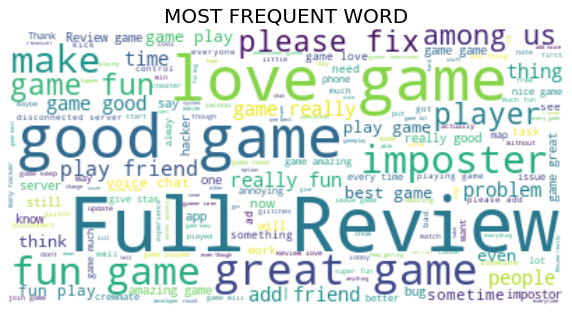

In [ ]:
# Showing Review wordcloud

review_word = WordCloud(background_color='white').generate(tostring(df['Review']))

plt.figure(figsize = (10,10))
plt.title('MOST FREQUENT WORD', fontsize=20)
plt.imshow(review_word, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Clean testing using regex

re.sub('...\nFull Review', '', df['Review'][1])

'Hey there! This game is really fun and all but, You need to add a few thing. First, you should add a friend option because when you make friends in that game, you immediently lose them when one of you leaves. Second, you need to add an account option, Because when you buy something expensive and whe'

In [ ]:
# Removing the unnecessary word uding regex

remove = re.compile(r'...\nFull Review')

df['Review'] = [remove.sub('', i) for i in df['Review']]

In [ ]:
# Showing cleaned text

df['Review'][1]

'Hey there! This game is really fun and all but, You need to add a few thing. First, you should add a friend option because when you make friends in that game, you immediently lose them when one of you leaves. Second, you need to add an account option, Because when you buy something expensive and whe'

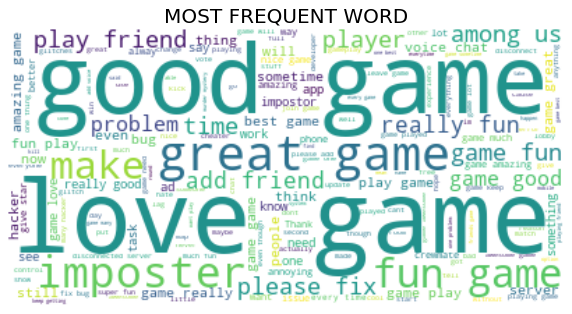

In [ ]:
# Showing cleaned Review wordcloud

review_word_clean = WordCloud(background_color='white').generate(tostring(df['Review']))

plt.figure(figsize = (10,10))
plt.title('MOST FREQUENT WORD', fontsize=20)
plt.imshow(review_word_clean, interpolation='bilinear')
plt.axis('off')
plt.show()

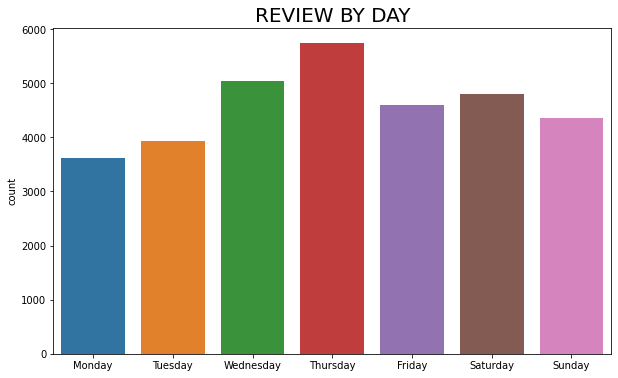

In [ ]:
# Date feature

# Day

m = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize = (10,6))
plt.title('REVIEW BY DAY', fontsize=20)
sns.countplot(sorted(df['Date'].dt.day_name(), key = m.index))
plt.show()

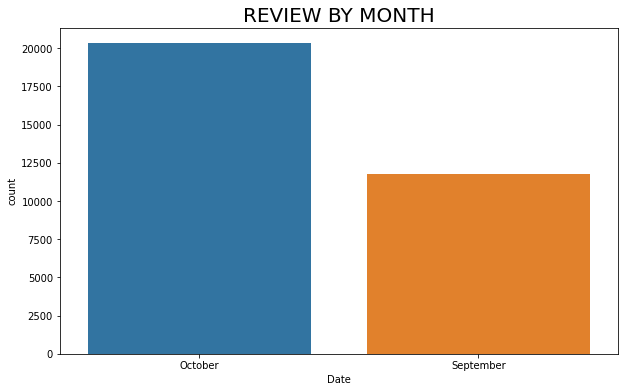

In [ ]:
# Months

plt.figure(figsize = (10,6))
plt.title('REVIEW BY MONTH', fontsize=20)
sns.countplot(df['Date'].dt.month_name())
plt.show()

In [ ]:
# detecting language

for i in range(len(df)):
    try :
        df['Language'] = detect(df['Review'][i])
    except :
        df['Language'] = 'unknown'

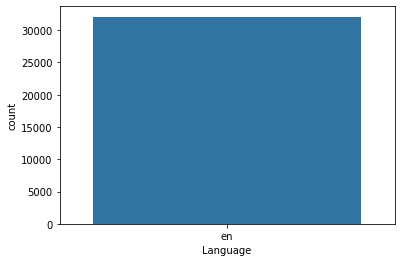

In [ ]:
sns.countplot(df['Language'])

In [ ]:
# Drop the Language features since it's redundant

df.drop(columns = ['Language'], inplace = True)

In [ ]:
df.head()

,Rating,User,Review,Date
1,4,Epic Sean22,Hey there! This game is really fun and all but...,2020-10-17
2,4,Wan Taquddin,"Everything about this game is amazing, the con...",2020-10-15
3,5,Eve,I love playing this game! It is so much fun wh...,2020-10-15
4,5,Gab .M,Its extremely fun and addictive! It got pretty...,2020-10-16
5,5,Kaizin,I love this game a lot! I have a lot of fun wi...,2020-10-16
